In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [4]:
##data collection and processing


In [9]:
##Loading the csv data into pandas DF
gold_data = pd.read_csv('gld_price_data.csv')

In [11]:
##print first 5 rows of the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [13]:
##last five rows
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [16]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [18]:
# gettig some basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [20]:
# number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [22]:
# getting statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [23]:
#find the correlayion btw various datapoints
#1. positive correlation: directly proportional
#2.negative correlation: indirectly proportional

In [26]:
correlation = gold_data.corr()

<AxesSubplot:>

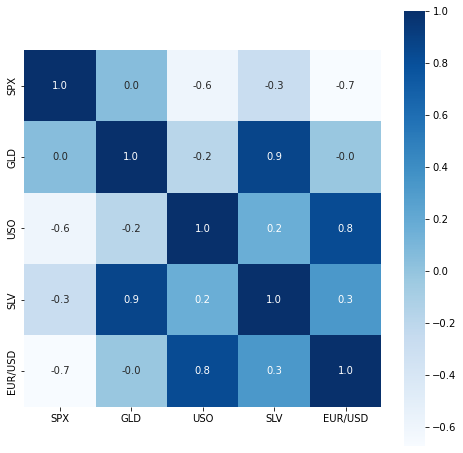

In [35]:
#constructing heat map to understand correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':10},  cmap='Blues')

In [33]:
# therefore if the Gold value increases, then the Silver value also increase as the value 0.9 is positive

In [37]:
#correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

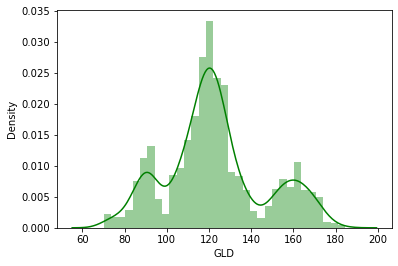

In [39]:
#checking the distribution of the gold price
sns.distplot(gold_data['GLD'],color='green')      #distribution plot

In [40]:
#according to this, most values lie in the range of 120  n on 70 n 160 but the maximum is in 120.
# i.e, most values in the span of 2008 n 2018 lies in the range of 120.
# density is the number of values, so clearly the density is higher in price 120, i,e most values are 120.


In [41]:
#splitting the features and target
#the target is gold price
# features r spx and uso

X = gold_data.drop(['Date','GLD'],axis = 1)   #features list made by dropping the not needed columns written here
#axis = 1 mean dropping a column , axis = 0 means dropping a row
Y = gold_data['GLD']     #Target with only Gold price in it


In [42]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [43]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [44]:
#Splitting into Training Data and Test Data


In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)

In [46]:
#Model Training
#Random Forest Regressor : ensemble learning, i.e made of more than 1 model
#made of decision trees; so there will be n number of decision trees being used.
#esch decision tree will predict a value, and then the majority or the average value among them will be chosen as the Predicted value.
    

In [47]:
regressor = RandomForestRegressor(n_estimators=100)

In [48]:
##training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [49]:
#Model Evaluation

In [50]:
#prediction on test data
test_data_prediction = regressor.predict(X_test)

In [51]:
print(test_data_prediction)

[168.56429919  82.05909971 115.97470017 127.88230083 120.46800099
 154.71569822 150.05379845 126.09530053 117.36779872 125.91450088
 116.81160077 171.1963008  141.51579868 167.87499862 114.96900046
 117.60140039 138.00170256 170.42760123 158.56240244 161.11579855
 154.99100015 125.33960033 175.88109983 157.66990358 125.20030017
  93.9301996   77.70459985 120.75399979 119.15359985 167.56580044
  88.15160032 125.16329991  91.29320068 117.60290012 121.05129924
 136.29469957 115.30080081 115.25490077 148.81209933 107.25000084
 104.60220242  87.26349781 126.61840034 117.84700011 152.81079942
 119.64450006 108.36580044 108.21489832  93.32020056 127.30009727
  75.01670059 113.67649881 121.38900001 111.09249914 118.93279901
 120.74459951 159.8704998  169.66540209 147.11509705  85.89659905
  94.4281003   86.74659895  90.6433998  119.04750095 126.45940104
 127.55100032 170.59310033 122.23509934 117.45089902  98.69950073
 167.90470068 143.38399908 132.26770321 121.15280188 121.88529946
 119.60350

In [53]:
##now to check these values
# Rsquared error can be used to check the metrics
error_score = metrics.r2_score(Y_test, test_data_prediction)    # to check whether the predicted test_data_prediction is equal to the Y_test which is the actual data
print('Rsquared error :', error_score)

Rsquared error : 0.9891170550418092


In [54]:
#we can compare the actual values n predicted values in a plot to see how close they are
#we will convert the values from a dataframe to list to reduce error
Y_test = list(Y_test)

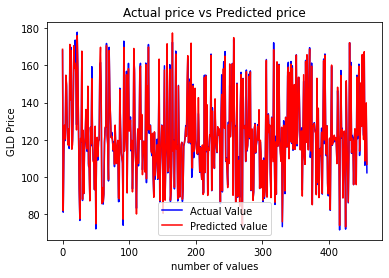

In [57]:
plt.plot(Y_test,color='blue', label='Actual Value')
plt.plot(test_data_prediction, color ='red', label = 'Predicted value')
plt.title('Actual price vs Predicted price')
plt.xlabel('number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()